In [1]:
#dependencies
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter('ignore')
%matplotlib inline
from sklearn.utils import shuffle

In [2]:
aggr_encoded = pd.read_csv('../data/agg_encode_non_self_employee.csv')
# aggr_encoded = shuffle(aggr_encoded)

In [4]:
target_list=["treatment", "tech_company", "wellness_program"]
#14 X values no_employees, benefits,care_options, seek_help, anonymity, leave, supervisor, coworkers, family_history, phys_health_interview, mental_health_interview, obs_consequence, age, gender
X = aggr_encoded.drop(target_list, axis=1)


In [5]:
# y1=Has the employee seek mental health treatment? (treatment)
# y2=Is your employer primarily a tech company/organization? (tech_company)
# y3=Will the employer bring awareness to mental health in a wellness program? (wellness_program)# Treatment

In [6]:
y1 = aggr_encoded["treatment"]
print(X.shape, y1.shape)

(3089, 47) (3089,)


## Logistic Regression

In [7]:
#import train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [8]:
#split data
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, random_state=42, stratify=y1)
X_train.head()

,age,no_employees_1-5,no_employees_100-500,no_employees_26-100,no_employees_500-1000,no_employees_6-25,no_employees_More than 1000,benefits_I don't know,benefits_No,benefits_Not eligible for coverage / NA,...,phys_health_interview_Yes,mental_health_interview_Maybe,mental_health_interview_No,mental_health_interview_Yes,obs_consequence_Maybe/Not sure,obs_consequence_No,obs_consequence_Yes,gender_F,gender_M,gender_nonbinary
655,27,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2390,36,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
1342,34,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
435,29,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
654,20,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0


In [9]:
#import LogisticRegression 
from sklearn.linear_model import LogisticRegression

#assign to classifier
classifier = LogisticRegression()
classifier


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
#Fit model using the training data
classifier.fit(X_train, y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
#Validate the model using the test data
treatment_log_reg_train = classifier.score(X_train, y1_train)
treatment_log_reg_test = classifier.score(X_test, y1_test)
print(f"Training Data Score: {treatment_log_reg_train}")
print(f"Testing Data Score: {treatment_log_reg_test}")


Training Data Score: 0.7167530224525043
Testing Data Score: 0.7373868046571799


In [12]:
#Make predictions
predictions = classifier.predict(X_test)
print(f"First 30 Predictions:   {predictions[:30]}")
print(f"First 30 Actual labels: {y1_test[:30].tolist()}")


First 30 Predictions:   [1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1]
First 30 Actual labels: [1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1]


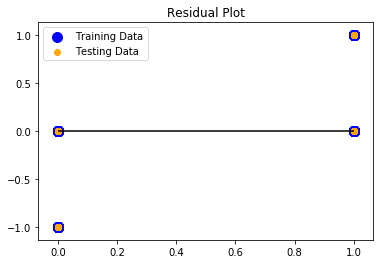

In [13]:
plt.scatter(classifier.predict(X_train), classifier.predict(X_train) - y1_train, c="blue", label="Training Data", s=100)
plt.scatter(classifier.predict(X_test), classifier.predict(X_test) - y1_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y1_test.min(), xmax=y1_test.max())
plt.title("Residual Plot")
plt.show()


In [14]:
# Look at weights for each column
pd.DataFrame({"cols": X.columns, "weights": classifier.coef_.reshape(-1)})

,cols,weights
0,age,0.016374
1,no_employees_1-5,0.100326
2,no_employees_100-500,0.045987
3,no_employees_26-100,-0.045067
4,no_employees_500-1000,-0.225829
5,no_employees_6-25,0.061715
6,no_employees_More than 1000,0.092472
7,benefits_I don't know,-0.289861
8,benefits_No,-0.028166
9,benefits_Not eligible for coverage / NA,0.277216


Having a Family history of mental illness has a strong weight to this model

## Tree

In [15]:
#use decision tree model
feature_names = X.columns
X.head()


,age,no_employees_1-5,no_employees_100-500,no_employees_26-100,no_employees_500-1000,no_employees_6-25,no_employees_More than 1000,benefits_I don't know,benefits_No,benefits_Not eligible for coverage / NA,...,phys_health_interview_Yes,mental_health_interview_Maybe,mental_health_interview_No,mental_health_interview_Yes,obs_consequence_Maybe/Not sure,obs_consequence_No,obs_consequence_Yes,gender_F,gender_M,gender_nonbinary
0,37,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
1,44,0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0
2,32,0,0,0,0,1,0,0,1,0,...,1,0,0,1,0,1,0,0,1,0
3,31,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
4,31,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0


In [16]:
#import decision tree library
from sklearn import tree

In [17]:
#Decision Tree classifier y1 
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y1_train)  
clf.score(X_test, y1_test)

print(f"Testing Data Score: {clf.score(X_test, y1_test)}")

Testing Data Score: 0.6416558861578266


In [18]:
#import Random Forest library
from sklearn.ensemble import RandomForestClassifier

In [20]:
#Random Forest classifier y1
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y1_train)
treatment_rf_test = rf.score(X_test, y1_test) 
print(f"Test Data Score: {treatment_rf_test}")

Test Data Score: 0.7347994825355757


In [21]:
treatment_rf_train = rf.score(X_train, y1_train)
print(f"Train Data Score: {treatment_rf_train}")

Train Data Score: 1.0


In [22]:
#sort feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.12331151905208322, 'age'),
 (0.06875557016332004, 'family_history_No'),
 (0.05872005974060267, 'family_history_Yes'),
 (0.03326609218495224, 'care_options_Yes'),
 (0.023537334559142583, 'phys_health_interview_Maybe'),
 (0.023081434078280387, 'care_options_No'),
 (0.022567792511908494, 'leave_Easy'),
 (0.022302662550148657, 'obs_consequence_No'),
 (0.02225520184402664, 'no_employees_26-100'),
 (0.02166325316040149, 'coworkers_No'),
 (0.021535943818942548, 'phys_health_interview_No'),
 (0.02074360287137949, 'no_employees_More than 1000'),
 (0.020620735798286747, "leave_I don't know"),
 (0.020580908421739874, 'supervisor_Yes'),
 (0.020328551620987564, 'benefits_Yes'),
 (0.02023704236321106, 'obs_consequence_Yes'),
 (0.02020523088843865, 'leave_Difficult'),
 (0.02017029000867895, 'seek_help_No'),
 (0.019821014902228748, 'no_employees_100-500'),
 (0.019492649392392463, 'no_employees_6-25'),
 (0.019301263985352358, 'supervisor_No'),
 (0.018746166070049083, "benefits_I don't know"),
 (0.0

Age and family history are important features

## KNN

In [23]:
#Import KNN
from sklearn.neighbors import KNeighborsClassifier

In [24]:
#KNN for y1 Treatment
# Loop through different k values to see which has the highest accuracy
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y1_train)
    train_score = knn.score(X_train, y1_train)
    test_score = knn.score(X_test, y1_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.613
k: 3, Train/Test Score: 0.803/0.660
k: 5, Train/Test Score: 0.772/0.658
k: 7, Train/Test Score: 0.746/0.666
k: 9, Train/Test Score: 0.739/0.673
k: 11, Train/Test Score: 0.730/0.668
k: 13, Train/Test Score: 0.732/0.677
k: 15, Train/Test Score: 0.725/0.684
k: 17, Train/Test Score: 0.721/0.670
k: 19, Train/Test Score: 0.715/0.687


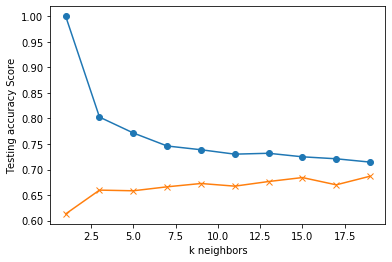

In [25]:
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [26]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y1_train)
treatment_knn_train = knn.score(X_train, y1_train)
treatment_knn_test = knn.score(X_test, y1_test)
print('k=19 Train Acc: %.3f' % treatment_knn_train)
print('k=19 Test Acc: %.3f' % treatment_knn_test)


k=19 Train Acc: 0.715
k=19 Test Acc: 0.687


In [28]:
predict = knn.predict(X_test)

## SVM

In [29]:
target_names = ["no", "yes"]

# Create a support vector machine linear classifier and fit it to the training data
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y1_train)
predictions = model.predict(X_test)

treatment_svm_train = model.score(X_train, y1_train)
treatment_svm_test = model.score(X_test, y1_test)

# Print the model score using the test data
print(f"Training Data Score: {treatment_svm_train}")
print(f"Testing Data Score: {treatment_svm_test}")

Training Data Score: 0.6964594127806563
Testing Data Score: 0.7166882276843467


In [30]:
# Calculate the classification report
from sklearn.metrics import classification_report
print(classification_report(y1_test, predictions,
                            target_names=target_names))


              precision    recall  f1-score   support

          no       0.68      0.67      0.67       336
         yes       0.75      0.75      0.75       437

    accuracy                           0.72       773
   macro avg       0.71      0.71      0.71       773
weighted avg       0.72      0.72      0.72       773



# Tech Company

In [31]:
# Target values is tech_company
y2 = aggr_encoded["tech_company"]
print(X.shape, y2.shape)

(3089, 47) (3089,)


In [32]:
#split and train
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, random_state=42, stratify=y2)

## Logistic Regression

In [33]:
classifier = LogisticRegression()
classifier.fit(X_train, y2_train)

tech_log_reg_train = classifier.score(X_train, y2_train)
tech_log_reg_test = classifier.score(X_test, y2_test)
print(f"Training Data Score: {tech_log_reg_train}")
print(f"Testing Data Score: {tech_log_reg_test}")


Training Data Score: 0.7936096718480138
Testing Data Score: 0.7878395860284605


Model has an accuracy of 78%

In [34]:
#Make predictions
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y2_test[:10].tolist()}")


First 10 Predictions:   [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
First 10 Actual labels: [1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0]


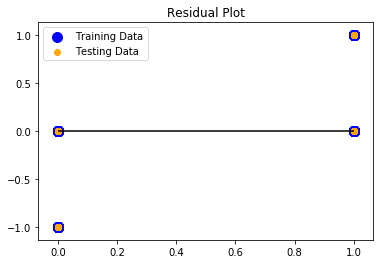

In [35]:
plt.scatter(classifier.predict(X_train), classifier.predict(X_train) - y2_train, c="blue", label="Training Data", s=100)
plt.scatter(classifier.predict(X_test), classifier.predict(X_test) - y2_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y2_test.min(), xmax=y2_test.max())
plt.title("Residual Plot")
plt.show()


In [36]:
# Look at weights for each column
pd.DataFrame({"cols": X.columns, "weights": classifier.coef_.reshape(-1)})

,cols,weights
0,age,-0.016556
1,no_employees_1-5,0.936406
2,no_employees_100-500,0.131102
3,no_employees_26-100,0.219695
4,no_employees_500-1000,-0.736174
5,no_employees_6-25,0.614964
6,no_employees_More than 1000,-0.762944
7,benefits_I don't know,-0.109468
8,benefits_No,0.157280
9,benefits_Not eligible for coverage / NA,0.009713


number of employees (1-5) has a strong weight

## Tree

In [37]:
#target is tech_company
target_names = ["no", "yes"]

#Decision Tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y2_train)  
clf.score(X_test, y2_test)

0.6791720569210866

In [38]:
#Random Forest
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y2_train)
tech_rf_train = rf.score(X_train, y2_train)
tech_rf_train

0.9995682210708118

In [39]:
tech_rf_test = rf.score(X_test, y2_test)
print(f"Testing Data Score: {tech_rf_test}")

Testing Data Score: 0.7800776196636481


In [40]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)


[(0.1465766574560209, 'age'),
 (0.038965300978943566, 'no_employees_More than 1000'),
 (0.026548236577555357, 'phys_health_interview_Maybe'),
 (0.024864013081769186, 'family_history_Yes'),
 (0.023628954103232905, 'phys_health_interview_No'),
 (0.023605521984763712, 'family_history_No'),
 (0.022827563901889524, 'obs_consequence_No'),
 (0.02260906193231382, 'care_options_No'),
 (0.02237854698095382, 'leave_Easy'),
 (0.021902363925615047, "anonymity_I don't know"),
 (0.021473041605400183, 'supervisor_Yes'),
 (0.021442501491261097, 'coworkers_No'),
 (0.021190229404110715, 'anonymity_Yes'),
 (0.02093280344835482, 'gender_F'),
 (0.02090083003657085, 'seek_help_No'),
 (0.020856343803325173, 'benefits_Yes'),
 (0.020824342741623782, 'care_options_Yes'),
 (0.020759821078971178, 'leave_Difficult'),
 (0.020265251376362387, 'supervisor_No'),
 (0.02018459853116552, 'gender_M'),
 (0.020073868218585034, 'coworkers_Maybe'),
 (0.020006349450902405, 'obs_consequence_Yes'),
 (0.019942399898974762, "seek_h

## KNN

In [41]:
# Loop through different k values to see which has the highest accuracy
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y2_train)
    train_score = knn.score(X_train, y2_train)
    test_score = knn.score(X_test, y2_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    


k: 1, Train/Test Score: 1.000/0.680
k: 3, Train/Test Score: 0.846/0.732
k: 5, Train/Test Score: 0.822/0.765
k: 7, Train/Test Score: 0.801/0.766
k: 9, Train/Test Score: 0.799/0.779
k: 11, Train/Test Score: 0.791/0.781
k: 13, Train/Test Score: 0.788/0.771
k: 15, Train/Test Score: 0.788/0.777
k: 17, Train/Test Score: 0.790/0.779
k: 19, Train/Test Score: 0.788/0.781


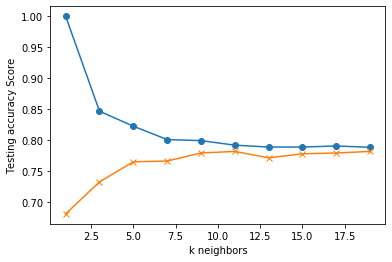

In [42]:
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()


In [43]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y2_train)

tech_knn_train = knn.score(X_train, y2_train)
tech_knn_test = knn.score(X_test, y2_test)

print('k=10 Test Acc: %.3f' % tech_knn_train)
print('k=10 Train Acc: %.3f' % tech_knn_test)

k=10 Test Acc: 0.799
k=10 Train Acc: 0.765


## SVM

In [44]:
target_names = ["no", "yes"]

# Create a support vector machine linear classifier and fit it to the training data
model = SVC(kernel='linear')
model.fit(X_train, y2_train)
predictions = model.predict(X_test)

tech_svm_train = model.score(X_train, y2_train)
tech_svm_test = model.score(X_test, y2_test)

print(f"Training Data Score: {tech_svm_train}")
# Print the model score using the test data
print(f"Testing Data Score: {tech_svm_test}")


Training Data Score: 0.7854058721934369
Testing Data Score: 0.7852522639068564


In [45]:
# Calculate the classification report
print(classification_report(y2_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

          no       0.00      0.00      0.00       166
         yes       0.79      1.00      0.88       607

    accuracy                           0.79       773
   macro avg       0.39      0.50      0.44       773
weighted avg       0.62      0.79      0.69       773



# Wellness Program

In [46]:
# Target values is wellness_program
y3 = aggr_encoded["wellness_program"]
print(X.shape, y3.shape)

(3089, 47) (3089,)


In [47]:
#split data
X_train, X_test, y3_train, y3_test = train_test_split(X, y3, random_state=42, stratify=y3)

## Logistic Regression

In [48]:
classifier = LogisticRegression()
classifier.fit(X_train, y3_train)

wellness_log_reg_train = classifier.score(X_train, y3_train)
wellness_log_reg_test = classifier.score(X_test, y3_test)

print(f"Training Data Score: {wellness_log_reg_train}")
print(f"Testing Data Score: {wellness_log_reg_test}")


Training Data Score: 0.7612262521588946
Testing Data Score: 0.7451487710219923


75% Accuracy 

In [49]:
#Make predictions
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y3_test[:10].tolist()}")

First 10 Predictions:   [0 1 0 0 0 1 0 0 0 2]
First 10 Actual labels: [0, 2, 2, 2, 1, 1, 0, 1, 0, 2]


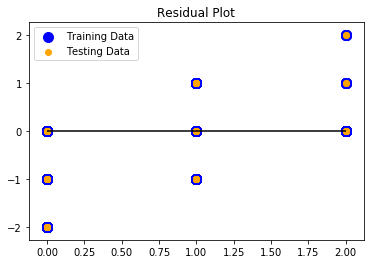

In [50]:
plt.scatter(classifier.predict(X_train), classifier.predict(X_train) - y3_train, c="blue", label="Training Data", s=100)
plt.scatter(classifier.predict(X_test), classifier.predict(X_test) - y3_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y3_test.min(), xmax=y3_test.max())
plt.title("Residual Plot")
plt.show()



## Tree

In [51]:
#target is wellness_program
target_names = ["no", "yes", "I don't know"]

#Decision Tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y3_train)  
clf.score(X_test, y3_test)

0.6274256144890039

In [52]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y3_train)
wellness_rf_train = rf.score(X_train, y3_train) 
wellness_rf_train

1.0

In [53]:
wellness_rf_test = rf.score(X_test, y3_test)
print(f"Testing Data Score: {wellness_rf_test}")

Testing Data Score: 0.7399741267787839


In [54]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.10819581323267752, 'age'),
 (0.09595038903146261, 'seek_help_Yes'),
 (0.07675886177330546, 'seek_help_No'),
 (0.030400916466339946, "seek_help_I don't know"),
 (0.02800604014368826, 'no_employees_More than 1000'),
 (0.026418660270600722, 'benefits_Yes'),
 (0.022661010444257577, 'phys_health_interview_Maybe'),
 (0.021643471305393368, 'leave_Easy'),
 (0.020936502349268422, 'family_history_No'),
 (0.02091260943916603, 'family_history_Yes'),
 (0.020680920784252484, 'care_options_No'),
 (0.020546786368815288, 'anonymity_Yes'),
 (0.020427947162615666, 'supervisor_Yes'),
 (0.020292249984867734, 'phys_health_interview_No'),
 (0.019908487528202533, 'no_employees_100-500'),
 (0.01937532586127547, 'care_options_Yes'),
 (0.01888443121027135, 'coworkers_Yes'),
 (0.01883356926338418, 'coworkers_Maybe'),
 (0.018619066364944554, 'obs_consequence_No'),
 (0.018110697768242236, 'gender_M'),
 (0.017870825607973147, "leave_I don't know"),
 (0.01767260696400095, 'gender_F'),
 (0.01759031980216733, 'care

## KNN

In [55]:
# Loop through different k values to see which has the highest accuracy
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y3_train)
    train_score = knn.score(X_train, y3_train)
    test_score = knn.score(X_test, y3_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    


k: 1, Train/Test Score: 1.000/0.625
k: 3, Train/Test Score: 0.816/0.674
k: 5, Train/Test Score: 0.777/0.684
k: 7, Train/Test Score: 0.769/0.693
k: 9, Train/Test Score: 0.768/0.697
k: 11, Train/Test Score: 0.755/0.708
k: 13, Train/Test Score: 0.753/0.712
k: 15, Train/Test Score: 0.749/0.708
k: 17, Train/Test Score: 0.742/0.712
k: 19, Train/Test Score: 0.737/0.712


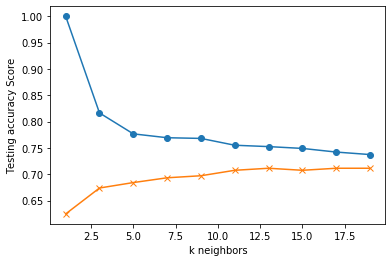

In [56]:
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [57]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y3_train)

wellness_knn_train = knn.score(X_train, y3_train)
wellness_knn_test = knn.score(X_test, y3_test)

print('k=19 Test Acc: %.3f' % wellness_knn_test)
print('k=19 Train Acc: %.3f' % wellness_knn_train)


k=19 Test Acc: 0.712
k=19 Train Acc: 0.737


# SVM

In [58]:
target_names = ["no", "yes", "I don't know"]

# Create a support vector machine linear classifier and fit it to the training data
model = SVC(kernel='linear')
model.fit(X_train, y3_train)
predictions = model.predict(X_test)

wellness_svm_train = model.score(X_train, y3_train)
wellness_svm_test = model.score(X_test, y3_test)

# Print the model score using the test data
print(f"Testing Data Score: {wellness_svm_test}")
print(f"Training Data Score: {wellness_svm_train}")

Testing Data Score: 0.7296248382923674
Training Data Score: 0.7478411053540587


In [59]:
# Calculate the classification report
print(classification_report(y3_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

          no       0.79      0.89      0.84       515
         yes       0.55      0.63      0.59       167
I don't know       0.00      0.00      0.00        91

    accuracy                           0.73       773
   macro avg       0.45      0.51      0.48       773
weighted avg       0.64      0.73      0.68       773



# Deep Neural Network

In [60]:
#preprocess data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

import tensorflow as tf
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import EarlyStopping


Using TensorFlow backend.


In [61]:
from tensorflow.python.keras import backend as k

## Treatment

In [62]:
label_encoder = LabelEncoder()
label_encoder.fit(y1_train)
encoded_y_train = label_encoder.transform(y1_train)
encoded_y_test = label_encoder.transform(y1_test)

y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

y_train_categorical.shape

(2316, 2)

In [63]:
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=47))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [64]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [65]:
# set early stopping as callback
callbacks = [EarlyStopping(monitor='val_loss', patience=2)]
model.fit(
    X_train_scaled,
    y_train_categorical,
    callbacks=callbacks,
    epochs=60,
    shuffle=True,
    verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/60
 - 2s - loss: 0.6902 - acc: 0.5553
Epoch 2/60
 - 0s - loss: 0.6799 - acc: 0.5738
Epoch 3/60
 - 0s - loss: 0.6684 - acc: 0.5855
Epoch 4/60
 - 0s - loss: 0.6542 - acc: 0.6149
Epoch 5/60
 - 0s - loss: 0.6285 - acc: 0.6481
Epoch 6/60
 - 0s - loss: 0.5990 - acc: 0.6826
Epoch 7/60
 - 0s - loss: 0.5513 - acc: 0.7150
Epoch 8/60
 - 0s - loss: 0.5052 - acc: 0.7461
Epoch 9/60
 - 0s - loss: 0.4412 - acc: 0.7932
Epoch 10/60
 - 0s - loss: 0.4075 - acc: 0.8182
Epoch 11/60
 - 0s - loss: 0.3470 - acc: 0.8510
Epoch 12/60
 - 0s - loss: 0.3066 - acc: 0.8674
Epoch 13/60
 - 0s - loss: 0.2545 - acc: 0.9007
Epoch 14/60
 - 0s - loss: 0.2206 - acc: 0.9093
Epoch 15/60
 - 0s - loss: 0.1851 - acc: 0.9296
Epoch 16/60
 - 0s - loss: 0.1561 - acc: 0.9408
Epoch 17/60
 - 0s - loss: 0.1398 - acc: 0.9456
Epoch 18/60
 - 0s - loss: 0.1189 - acc: 0.9594
Epoch 19/60
 - 0s - loss: 0.1043 - acc: 0.9637
Epoch 20/60
 - 0s - l

In [66]:
# Evaluate the model using the training data
treatment_dl_loss_train, treatment_dl_train = model.evaluate(
    X_train_scaled, y_train_categorical, verbose=2)
print(f"Train Loss: {treatment_dl_loss_train}, Train Accuracy: {treatment_dl_train}")

Train Loss: 0.07146443783053051, Train Accuracy: 0.9753886010362695


In [67]:
# Evaluate the model using the testing data
treatment_dl_loss_test, treatment_dl_test = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Test Loss: {treatment_dl_loss_test}, Test Accuracy: {treatment_dl_test}")

Test Loss: 2.699314417845219, Test Accuracy: 0.47736093143596375


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.25, random_state=1)


model = KNeighborsClassifier()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
y_predict



array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,

In [69]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)

array([[207, 118],
       [161, 287]])

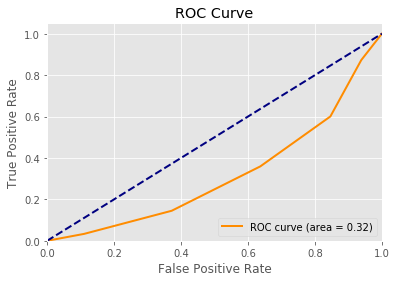

array([0.6, 0.8, 0.8, 0.6, 0.4, 0.8, 0.6, 0.4, 0.4, 1. , 0. , 0.4, 0.4,
       0.6, 0.6, 0.4, 0.6, 0.4, 0.6, 0.6, 0.4, 1. , 0.6, 0. , 0.4, 0.4,
       0.4, 0.2, 0.4, 0.4, 0.4, 0.8, 0.8, 0.2, 0.8, 0.6, 0.2, 0.2, 0.4,
       0.2, 0.2, 0.6, 0.4, 0. , 0.6, 1. , 0.8, 0.4, 0.4, 0.6, 0.2, 0.4,
       0.6, 0.8, 0.2, 0.8, 0.2, 0.2, 0.2, 0.4, 1. , 0.2, 1. , 1. , 0.6,
       0.6, 0.2, 0.4, 0.4, 0.2, 0.6, 0.4, 0.2, 0. , 0.4, 0.4, 0.4, 0.6,
       0.4, 0. , 0.4, 0.6, 0.4, 0. , 0. , 0.2, 0.2, 0.6, 0. , 0.6, 0.8,
       0.2, 0.8, 0. , 0.2, 0.6, 1. , 0.6, 0.6, 0.4, 0.4, 0.8, 0.4, 0.8,
       0.4, 0.4, 0.2, 1. , 0.8, 0. , 0.2, 0.2, 0.6, 0.2, 1. , 0.6, 1. ,
       0.6, 0. , 0.6, 0.8, 0.8, 0.8, 0.6, 0.4, 1. , 0.4, 0.6, 0.4, 0.4,
       0.6, 1. , 0.6, 1. , 0.6, 0.2, 1. , 0. , 0.4, 0.4, 0.6, 0.6, 0. ,
       0.4, 1. , 0.6, 0.6, 0.8, 0.2, 0.2, 0.4, 0.6, 0.2, 0.8, 0.4, 0. ,
       0.4, 0.6, 0. , 0.2, 0.6, 0.8, 0.6, 0.4, 0.6, 0.8, 0.4, 0.4, 0.4,
       0.2, 0.6, 0.4, 0.6, 0.8, 0.8, 0.6, 0.6, 1. , 0.2, 0.4, 0.

In [70]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

y_predict_probabilities = model.predict_proba(X_test)[:,0]

fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
y_predict_probabilities

## Tech Company

In [71]:
label_encoder = LabelEncoder()
label_encoder.fit(y2_train)
encoded_y_train = label_encoder.transform(y2_train)
encoded_y_test = label_encoder.transform(y2_test)

y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

y_train_categorical.shape

(2316, 2)

In [72]:
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=47))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [73]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [74]:
# set early stopping as callback
callbacks = [EarlyStopping(monitor='val_loss', patience=2)]
model.fit(
    X_train_scaled,
    y_train_categorical,
    callbacks=callbacks,
    epochs=60,
    shuffle=True,
    verbose=2)

Epoch 1/60
 - 2s - loss: 0.5319 - acc: 0.7858
Epoch 2/60
 - 0s - loss: 0.5129 - acc: 0.7854
Epoch 3/60
 - 0s - loss: 0.4969 - acc: 0.7854
Epoch 4/60
 - 0s - loss: 0.4767 - acc: 0.7854
Epoch 5/60
 - 0s - loss: 0.4503 - acc: 0.7884
Epoch 6/60
 - 0s - loss: 0.4239 - acc: 0.8057
Epoch 7/60
 - 0s - loss: 0.3879 - acc: 0.8312
Epoch 8/60
 - 0s - loss: 0.3444 - acc: 0.8446
Epoch 9/60
 - 0s - loss: 0.2918 - acc: 0.8752
Epoch 10/60
 - 0s - loss: 0.2238 - acc: 0.9098
Epoch 11/60
 - 0s - loss: 0.1862 - acc: 0.9296
Epoch 12/60
 - 0s - loss: 0.1479 - acc: 0.9434
Epoch 13/60
 - 0s - loss: 0.1632 - acc: 0.9374
Epoch 14/60
 - 0s - loss: 0.1066 - acc: 0.9577
Epoch 15/60
 - 0s - loss: 0.0863 - acc: 0.9719
Epoch 16/60
 - 0s - loss: 0.0880 - acc: 0.9672
Epoch 17/60
 - 0s - loss: 0.0880 - acc: 0.9646
Epoch 18/60
 - 0s - loss: 0.0625 - acc: 0.9784
Epoch 19/60
 - 0s - loss: 0.0613 - acc: 0.9784
Epoch 20/60
 - 0s - loss: 0.0550 - acc: 0.9806
Epoch 21/60
 - 0s - loss: 0.0418 - acc: 0.9875
Epoch 22/60
 - 0s - lo

In [75]:
# Evaluate the model using the training data
tech_dl_loss_train, tech_dl_train = model.evaluate(
    X_train_scaled, y_train_categorical, verbose=2)
print(f"Train Loss: {tech_dl_loss_train}, Train Accuracy: {tech_dl_train}")

Train Loss: 0.01622916919785264, Train Accuracy: 0.9926597582037997


In [76]:
# Evaluate the model using the testing data
tech_dl_loss_test, tech_dl_test = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Loss: {tech_dl_loss_test}, Accuracy: {tech_dl_test}")

Loss: 2.390858381870956, Accuracy: 0.7050452782913444


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.25, random_state=1)


model = KNeighborsClassifier()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
y_predict

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0.

In [78]:
confusion_matrix(y_test, y_predict)

array([[ 16, 154],
       [ 37, 566]])

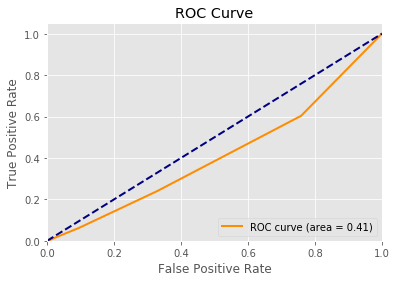

array([0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0.6, 0.2, 0.2, 0.2, 0.2, 0. ,
       0.4, 0.2, 0.2, 0.4, 0.2, 0.4, 0. , 0.2, 0. , 0. , 0. , 0.4, 0.4,
       0. , 0.2, 0. , 0.4, 0.4, 0. , 0. , 0.4, 0. , 0.2, 0. , 0.2, 0. ,
       0.6, 0.4, 0. , 0. , 0. , 0.2, 0. , 0. , 0.2, 0. , 0.2, 0.4, 0.4,
       0.4, 0. , 0.6, 0.2, 0.2, 0.4, 0.4, 0.2, 0. , 0.2, 0. , 0. , 0.2,
       0. , 0.2, 0.2, 0.4, 0.2, 0.2, 0. , 0. , 0. , 0. , 0. , 0.2, 0.2,
       0.2, 0.2, 0. , 0. , 0.2, 0. , 0.2, 0.2, 0.2, 0.2, 0.4, 0.6, 0.4,
       0. , 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0. , 0. , 0. , 0. , 0.2, 0.6,
       0. , 0.4, 0.4, 0.4, 0. , 0.2, 0.4, 0.4, 0.2, 0. , 0.2, 0. , 0.4,
       0. , 0.4, 0. , 0. , 0. , 0.2, 0. , 0.2, 0.2, 0.4, 0.2, 0.2, 0.2,
       0. , 0.4, 0.2, 0.2, 0. , 0.2, 0.4, 0.4, 0. , 0.2, 0.4, 0.2, 0. ,
       0.2, 0. , 0.2, 0. , 0.4, 0. , 0.2, 0. , 0.4, 0.2, 0.2, 0. , 0. ,
       0. , 0.4, 0.2, 0.4, 0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.6, 0. , 0.4,
       0.2, 0.2, 0.2, 0.2, 0. , 0. , 0. , 0. , 0. , 0.2, 0.2, 0.

In [79]:
y_predict_probabilities = model.predict_proba(X_test)[:,0]

fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
y_predict_probabilities

## Wellness Program

In [80]:
label_encoder = LabelEncoder()
label_encoder.fit(y3_train)
encoded_y_train = label_encoder.transform(y3_train)
encoded_y_test = label_encoder.transform(y3_test)

y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

y_train_categorical.shape

(2316, 3)

In [81]:
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=47))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

In [82]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 100)               4800      
_________________________________________________________________
dense_12 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_13 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_14 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_15 (Dense)             (None, 3)                 303       
Total params: 35,403
Trainable params: 35,403
Non-trainable params: 0
_________________________________________________________________


In [83]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [84]:
# set early stopping as callback
callbacks = [EarlyStopping(monitor='val_loss', patience=2)]
model.fit(
    X_train_scaled,
    y_train_categorical,
    callbacks=callbacks,
    epochs=60,
    shuffle=True,
    verbose=2)

Epoch 1/60
 - 2s - loss: 0.7477 - acc: 0.7060
Epoch 2/60
 - 0s - loss: 0.6329 - acc: 0.7535
Epoch 3/60
 - 0s - loss: 0.6051 - acc: 0.7630
Epoch 4/60
 - 0s - loss: 0.5771 - acc: 0.7647
Epoch 5/60
 - 0s - loss: 0.5560 - acc: 0.7781
Epoch 6/60
 - 0s - loss: 0.5288 - acc: 0.7884
Epoch 7/60
 - 0s - loss: 0.4998 - acc: 0.8027
Epoch 8/60
 - 0s - loss: 0.4586 - acc: 0.8217
Epoch 9/60
 - 0s - loss: 0.4183 - acc: 0.8320
Epoch 10/60
 - 0s - loss: 0.3918 - acc: 0.8532
Epoch 11/60
 - 0s - loss: 0.3318 - acc: 0.8722
Epoch 12/60
 - 0s - loss: 0.3004 - acc: 0.8869
Epoch 13/60
 - 0s - loss: 0.2693 - acc: 0.8964
Epoch 14/60
 - 0s - loss: 0.2156 - acc: 0.9257
Epoch 15/60
 - 0s - loss: 0.1838 - acc: 0.9357
Epoch 16/60
 - 0s - loss: 0.1643 - acc: 0.9417
Epoch 17/60
 - 0s - loss: 0.1444 - acc: 0.9478
Epoch 18/60
 - 0s - loss: 0.1104 - acc: 0.9607
Epoch 19/60
 - 0s - loss: 0.0961 - acc: 0.9693
Epoch 20/60
 - 0s - loss: 0.1006 - acc: 0.9642
Epoch 21/60
 - 0s - loss: 0.0831 - acc: 0.9763
Epoch 22/60
 - 0s - lo

In [85]:
# Evaluate the model using the training data
wellness_dl_loss_train, wellness_dl_train = model.evaluate(
    X_train_scaled, y_train_categorical, verbose=2)
print(f"Train Loss: {wellness_dl_loss_train}, Train Accuracy: {wellness_dl_train}")

Train Loss: 0.013792423742528946, Train Accuracy: 0.9939550949913645


In [86]:
# Evaluate the model using the testing data
wellness_dl_loss_test, wellness_dl_test = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Test Loss: {wellness_dl_loss_test}, Test Accuracy: {wellness_dl_test}")

Test Loss: 2.5619266764158417, Test Accuracy: 0.6946959897278198


In [90]:
model_results = pd.DataFrame(
    {"target": ["treatment", "treatment", "treatment","treatment","treatment","tech_company","tech_company","tech_company","tech_company","tech_company","wellness_program","wellness_program","wellness_program","wellness_program","wellness_program"],
     "train_score": [treatment_log_reg_train, treatment_rf_train, treatment_knn_train, treatment_svm_train, treatment_dl_train, tech_log_reg_train, tech_rf_train, tech_knn_train, tech_svm_train, tech_dl_train, wellness_log_reg_train, wellness_rf_train, wellness_knn_train, wellness_svm_train, wellness_dl_train],
     "test_score": [treatment_log_reg_test, treatment_rf_test, treatment_knn_test, treatment_svm_test, treatment_dl_test, tech_log_reg_test, tech_rf_test, tech_knn_test, tech_svm_test, tech_dl_test, wellness_log_reg_test, wellness_rf_test, wellness_knn_test, wellness_svm_test, wellness_dl_test],
     "model": ["log_regression", "random_forest", "knn", "svm", "dnn", "log_regression", "random_forest", "knn", "svm", "dnn", "log_regression", "random_forest", "knn", "svm", "dnn"]
     })

model_results


,target,train_score,test_score,model
0,treatment,0.716753,0.737387,log_regression
1,treatment,1.000000,0.734799,random_forest
2,treatment,0.714594,0.686934,knn
3,treatment,0.696459,0.716688,svm
4,treatment,0.975389,0.477361,dnn
5,tech_company,0.793610,0.787840,log_regression
6,tech_company,0.999568,0.780078,random_forest
7,tech_company,0.799223,0.764554,knn
8,tech_company,0.785406,0.785252,svm
9,tech_company,0.992660,0.705045,dnn


In [91]:
model_results.to_csv("../data/model_acc.csv",
                  encoding="utf-8", index=False, header=True)